## Analysis on Obesity Dataset Using Tensorflow Neural Networks

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adeniranstephen/obesity-prediction-dataset")

print("Path to dataset files:", path)

C:\Users\mmice\tensorflow_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\mmice\.cache\kagglehub\datasets\adeniranstephen\obesity-prediction-dataset\versions\1


In [2]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [3]:
#creating the dataframe

csv_path = file_path = r"C:\Users\mmice\.cache\kagglehub\datasets\adeniranstephen\obesity-prediction-dataset\versions\1\ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(csv_path)

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
# I want to create a classfier that is either obese or not obese. I created a mapping that will reorganize the data.

obesity_map = {
    'Insufficient_Weight': 'Not Obese',
    'Normal_Weight': 'Not Obese',
    'Overweight_Level_I': 'Not Obese',
    'Overweight_Level_II': 'Not Obese',
    'Obesity_Type_I': 'Obese',
    'Obesity_Type_II': 'Obese',
    'Obesity_Type_III': 'Obese'
}

In [5]:
df['NObeyesdad'] = df['NObeyesdad'].map(obesity_map)

In [6]:
df['NObeyesdad']

0       Not Obese
1       Not Obese
2       Not Obese
3       Not Obese
4       Not Obese
          ...    
2106        Obese
2107        Obese
2108        Obese
2109        Obese
2110        Obese
Name: NObeyesdad, Length: 2111, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
unique_vals = {col: df[col].unique() for col in df.columns}

unique_vals

{'Gender': array(['Female', 'Male'], dtype=object),
 'Age': array([21, 23, 27, 22, 29, 24, 26, 41, 30, 52, 20, 19, 31, 39, 17, 25, 55,
        38, 18, 15, 61, 44, 34, 36, 32, 35, 40, 45, 33, 51, 56, 28, 16, 37,
        14, 42, 43, 46, 48, 47]),
 'Height': array([1.62, 1.52, 1.8 , 1.78, 1.5 , 1.64, 1.72, 1.85, 1.65, 1.77, 1.7 ,
        1.93, 1.53, 1.71, 1.69, 1.6 , 1.75, 1.68, 1.58, 1.79, 1.56, 1.67,
        1.66, 1.81, 1.82, 1.55, 1.61, 1.63, 1.76, 1.57, 1.88, 1.87, 1.89,
        1.74, 1.83, 1.92, 1.73, 1.84, 1.91, 1.48, 1.59, 1.54, 1.9 , 1.86,
        1.45, 1.98, 1.51, 1.46, 1.49, 1.95, 1.94]),
 'Weight': array([ 64.  ,  56.  ,  77.  , ..., 131.41, 133.69, 133.35]),
 'family_history_with_overweight': array(['yes', 'no'], dtype=object),
 'FAVC': array(['no', 'yes'], dtype=object),
 'FCVC': array([2.  , 3.  , 1.  , 2.45, 2.88, 2.01, 2.6 , 2.59, 2.39, 1.12, 2.03,
        2.66, 2.89, 2.71, 2.75, 1.49, 2.21, 2.06, 2.31, 2.82, 2.05, 2.77,
        2.74, 2.57, 2.52, 2.97, 1.08, 1.27, 1.34, 2.

In [9]:
l_encoder = LabelEncoder()

df['NObeyesdad'] = l_encoder.fit_transform(df['NObeyesdad'])

In [39]:
df['NObeyesdad'].unique()

array([0, 1])

In [10]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_df.corr()

# Correlation of each numeric column with the target
corr_with_target = corr_matrix['NObeyesdad'].sort_values(ascending=False)
print(corr_with_target)

NObeyesdad    1.000000
Weight        0.793651
Age           0.219205
FCVC          0.174968
Height        0.135976
CH2O          0.097416
NCP           0.036942
TUE          -0.082749
FAF          -0.147077
Name: NObeyesdad, dtype: float64


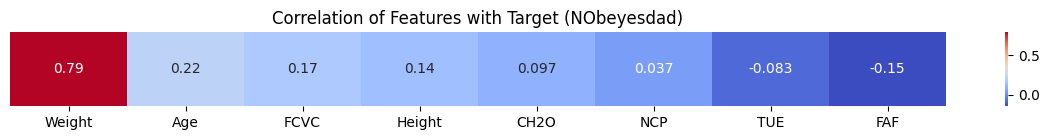

In [11]:
# Drop the target itself to avoid perfect correlation
target_corr = corr_with_target.drop('NObeyesdad')

# Convert to DataFrame with feature names as columns, so it becomes 1 row
target_corr_df = pd.DataFrame([target_corr])

# Plot the heatmap
plt.figure(figsize=(12, 1.5))  # you can change width if you have many features
sns.heatmap(target_corr_df, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation of Features with Target (NObeyesdad)')
plt.yticks([])  # Hides the single row label
plt.tight_layout()
plt.show()

In [12]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n{col} vs Target Mean:")
    print(df.groupby(col)['NObeyesdad'].mean().sort_values(ascending=False))



Gender vs Target Mean:
Gender
Female    0.461170
Male      0.459738
Name: NObeyesdad, dtype: float64

family_history_with_overweight vs Target Mean:
family_history_with_overweight
yes    0.558517
no     0.020779
Name: NObeyesdad, dtype: float64

FAVC vs Target Mean:
FAVC
yes    0.510718
no     0.077551
Name: NObeyesdad, dtype: float64

CAEC vs Target Mean:
CAEC
Sometimes     0.540510
Always        0.150943
no            0.039216
Frequently    0.033058
Name: NObeyesdad, dtype: float64

SMOKE vs Target Mean:
SMOKE
yes    0.500000
no     0.459603
Name: NObeyesdad, dtype: float64

SCC vs Target Mean:
SCC
no     0.480893
yes    0.031250
Name: NObeyesdad, dtype: float64

CALC vs Target Mean:
CALC
Sometimes     0.513205
no            0.370892
Frequently    0.228571
Always        0.000000
Name: NObeyesdad, dtype: float64

MTRANS vs Target Mean:
MTRANS
Public_Transportation    0.480380
Automobile               0.450766
Motorbike                0.272727
Bike                     0.142857
Walking

C:\Users\mmice\AppData\Local\Temp\ipykernel_26136\2957647601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='viridis')


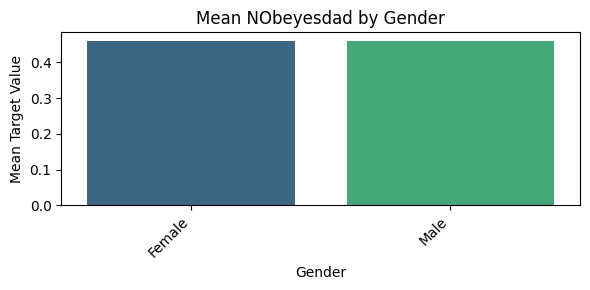

C:\Users\mmice\AppData\Local\Temp\ipykernel_26136\2957647601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='viridis')


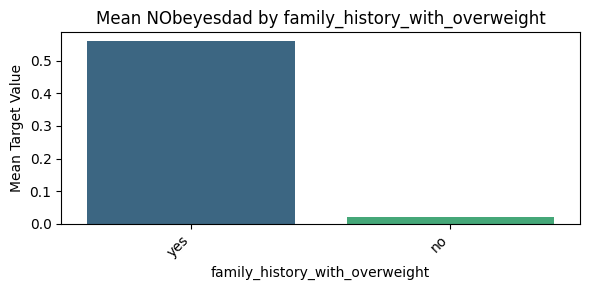

C:\Users\mmice\AppData\Local\Temp\ipykernel_26136\2957647601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='viridis')


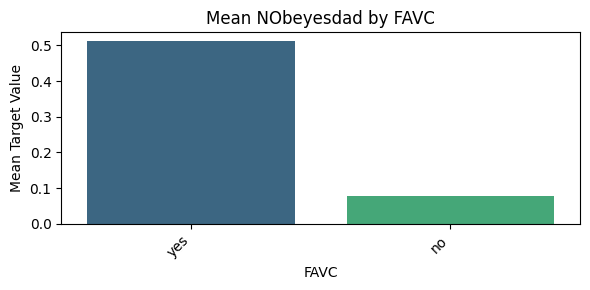

C:\Users\mmice\AppData\Local\Temp\ipykernel_26136\2957647601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='viridis')


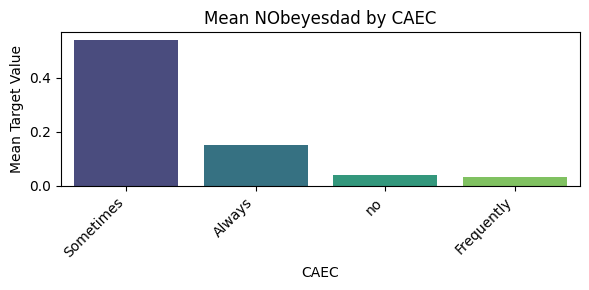

C:\Users\mmice\AppData\Local\Temp\ipykernel_26136\2957647601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='viridis')


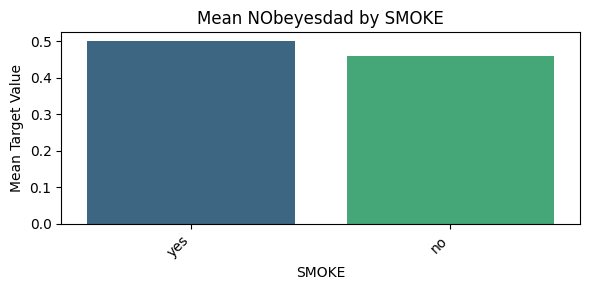

C:\Users\mmice\AppData\Local\Temp\ipykernel_26136\2957647601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='viridis')


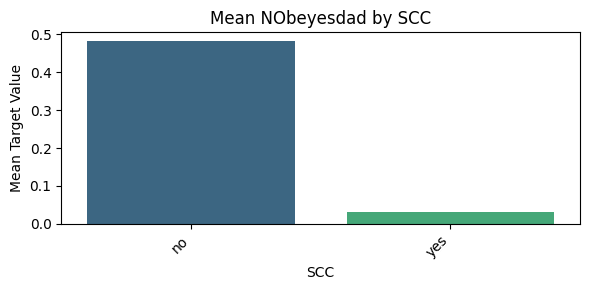

C:\Users\mmice\AppData\Local\Temp\ipykernel_26136\2957647601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='viridis')


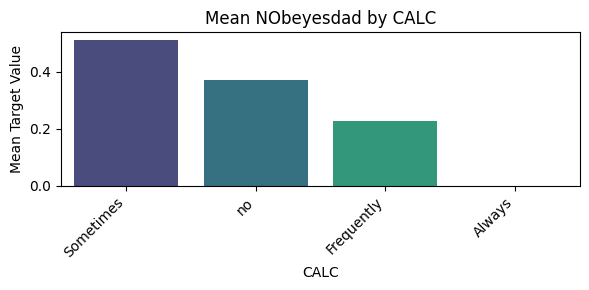

C:\Users\mmice\AppData\Local\Temp\ipykernel_26136\2957647601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='viridis')


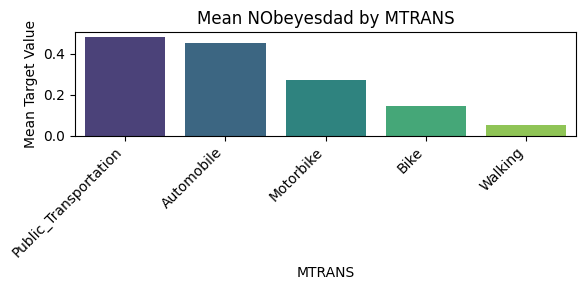

In [13]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    means = df.groupby(col)['NObeyesdad'].mean().sort_values(ascending=False)

    sns.barplot(x=means.index, y=means.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Mean NObeyesdad by {col}')
    plt.ylabel('Mean Target Value')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [14]:
df_features = df.drop('NObeyesdad', axis = 1)
df_target = df['NObeyesdad']

print(df_features.columns.tolist())
print(df_target.name)

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
NObeyesdad


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, train_size=0.8)

In [16]:
#We need to convert catergorical columns into numerical columns
O_encoder = OneHotEncoder(sparse_output = False, drop = 'first')
scaler = StandardScaler()

label_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for columns in label_columns:
    X_train[columns] = l_encoder.fit_transform(X_train[columns])
    X_test[columns] = l_encoder.transform(X_test[columns])

one_hot_columns = ['CAEC', 'CALC', 'MTRANS']

X_train = pd.get_dummies(X_train, columns = one_hot_columns, drop_first = True)
X_test = pd.get_dummies(X_test, columns = one_hot_columns, drop_first = True)

X_train = X_train.astype(int)
X_test = X_test.astype(int)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 2011 to 1351
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          423 non-null    int64
 1   Age                             423 non-null    int64
 2   Height                          423 non-null    int64
 3   Weight                          423 non-null    int64
 4   family_history_with_overweight  423 non-null    int64
 5   FAVC                            423 non-null    int64
 6   FCVC                            423 non-null    int64
 7   NCP                             423 non-null    int64
 8   SMOKE                           423 non-null    int64
 9   CH2O                            423 non-null    int64
 10  SCC                             423 non-null    int64
 11  FAF                             423 non-null    int64
 12  TUE                             423 non-null    int64
 13  CAEC_F

In [18]:
#y_train = l_encoder.fit_transform(y_train)
#y_test = l_encoder.transform(y_test)

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_dim=23))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\mmice\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=100)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7334 - loss: 0.6094 - val_accuracy: 0.8014 - val_loss: 0.5253
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8382 - loss: 0.4746 - val_accuracy: 0.8180 - val_loss: 0.4485
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8303 - loss: 0.4204 - val_accuracy: 0.8345 - val_loss: 0.4000
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8675 - loss: 0.3614 - val_accuracy: 0.8487 - val_loss: 0.3651
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8799 - loss: 0.3272 - val_accuracy: 0.8605 - val_loss: 0.3378
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8915 - loss: 0.2999 - val_accuracy: 0.8771 - val_loss: 0.3148
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9030 - loss: 0.2858 - val_accuracy: 0.8960 - val_loss: 0.2956
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9133 - loss: 0.2653 - val_accuracy: 0.8983 - val_loss

[]

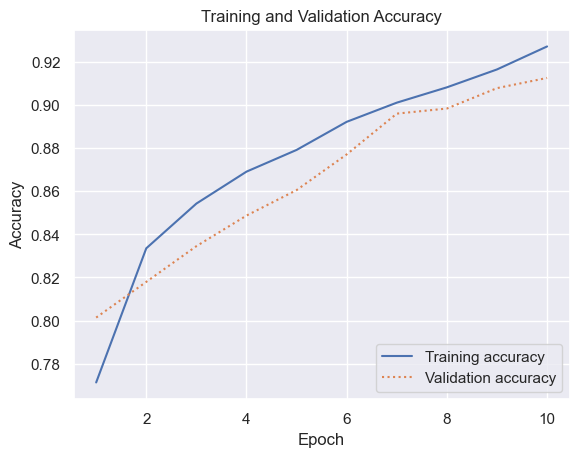

In [22]:
#plotting our training accuracy versus our validation accuracy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

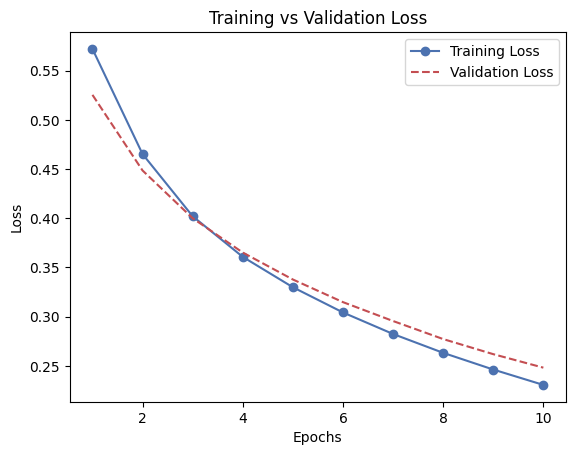

In [23]:
#Plotting the loss values of training vs validation

# Reset seaborn settings
sns.reset_orig()

# Extract loss values
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training vs validation loss
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' means blue line with circle markers
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')  # 'r--' means red dashed line
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
#creating our predictions for our confusion matrix and scores

from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay


sns.reset_orig()
y_predicted = model.predict(X_test_scaled) > 0.5

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Accuracy: 0.9125
Recall: 0.9369
F1 Score: 0.9125
Precision: 0.8894


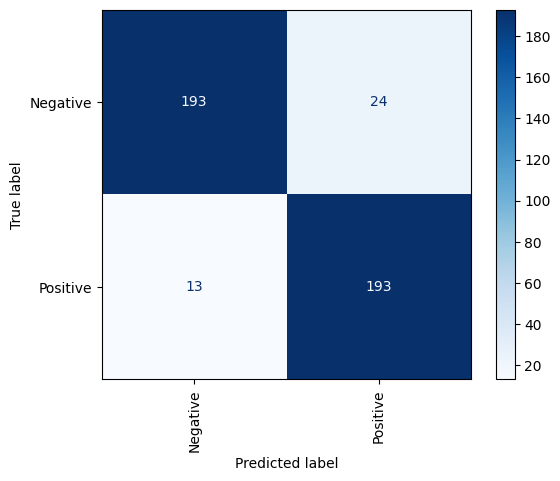

In [25]:
#use our predicted scores versus our y_test encoded data to calculate our scores
# use our predictions versus our y_test encoded data to create our confusion matrix

# Reset seaborn settings
sns.reset_orig()

accuracy = accuracy_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")


labels = ['Negative', 'Positive']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical',)

# Show the plot
plt.show()

In [26]:
model2 = Sequential()

model2.add(Dense(64, activation='relu', input_dim=23))

model2.add(Dense(32, activation='relu'))

model2.add(Dense(1,activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

C:\Users\mmice\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
hist2 = model2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=100)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6050 - loss: 0.6441 - val_accuracy: 0.8369 - val_loss: 0.4859
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8599 - loss: 0.4292 - val_accuracy: 0.8511 - val_loss: 0.3713
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8923 - loss: 0.3329 - val_accuracy: 0.8771 - val_loss: 0.3048
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9136 - loss: 0.2669 - val_accuracy: 0.8936 - val_loss: 0.2580
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9332 - loss: 0.2223 - val_accuracy: 0.9078 - val_loss: 0.2233
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9444 - loss: 0.1798 - val_accuracy: 0.9220 - val_loss: 0.1961
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9511 - loss: 0.1644 - val_accuracy: 0.9291 - val_loss: 0.1764
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9626 - loss: 0.1393 - val_accuracy: 0.9291 - val_loss

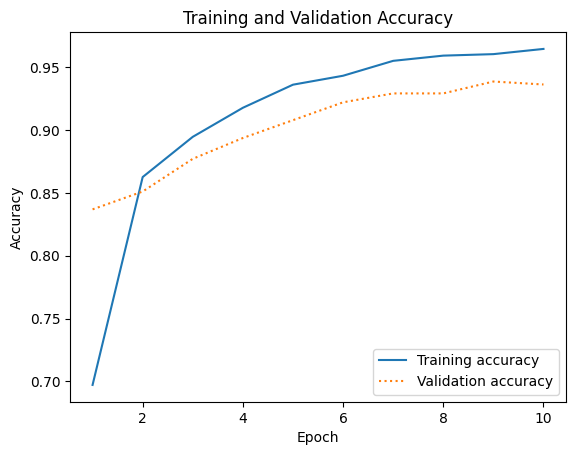

In [28]:
#plotting our training accuracy versus our validation accuracy
sns.reset_orig()

acc = hist2.history['accuracy']
val = hist2.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

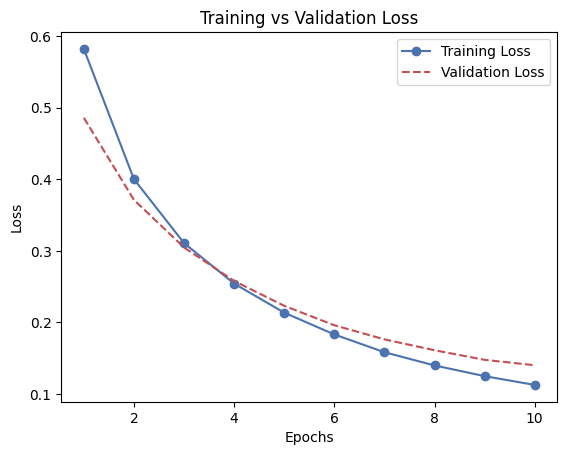

In [29]:
#Plotting the loss values of training vs validation

# Reset seaborn settings
sns.reset_orig()

# Extract loss values
train_loss = hist2.history['loss']
val_loss = hist2.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training vs validation loss
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' means blue line with circle markers
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')  # 'r--' means red dashed line
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
sns.reset_orig()
y_predicted2 = model2.predict(X_test_scaled) > 0.5

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Accuracy: 0.9362
Recall: 0.9417
F1 Score: 0.9349
Precision: 0.9282


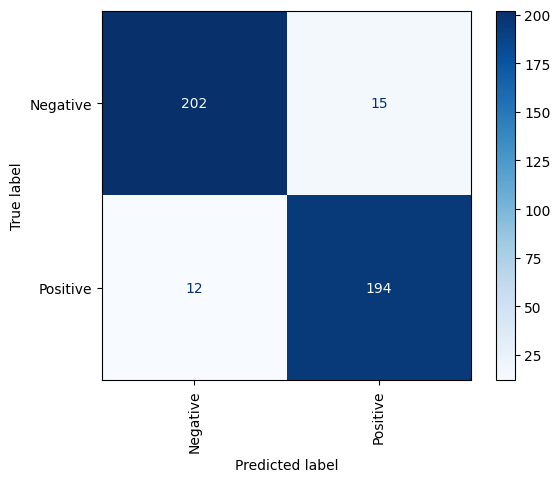

In [31]:
# Reset seaborn settings
sns.reset_orig()

accuracy = accuracy_score(y_test, y_predicted2)
recall = recall_score(y_test, y_predicted2)
f1 = f1_score(y_test, y_predicted2)
precision = precision_score(y_test, y_predicted2)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")


labels = ['Negative', 'Positive']
cmd.from_predictions(y_test, y_predicted2, display_labels=labels, cmap='Blues', xticks_rotation='vertical',)

# Show the plot
plt.show()

In [32]:
model3 = Sequential()

model3.add(Dense(64, activation ='relu', input_dim = 23)), Dropout(.5),

model3.add(Dense(64, activation ='relu')), Dropout(.5),

model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

C:\Users\mmice\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,761 (22.50 KB)

 Trainable params: 5,761 (22.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor = 'loss', patience = 3)

In [34]:
hist3 = model3.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs = 50, batch_size= 100, callbacks = [callback])

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5049 - loss: 0.6870 - val_accuracy: 0.7943 - val_loss: 0.5222
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8186 - loss: 0.4718 - val_accuracy: 0.8345 - val_loss: 0.4058
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8490 - loss: 0.3653 - val_accuracy: 0.8582 - val_loss: 0.3347
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8749 - loss: 0.3063 - val_accuracy: 0.8889 - val_loss: 0.2791
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9130 - loss: 0.2555 - val_accuracy: 0.9031 - val_loss: 0.2391
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9445 - loss: 0.1948 - val_accuracy: 0.9267 - val_loss: 0.2067
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9478 - loss: 0.1743 - val_accuracy: 0.9314 - val_loss: 0.1787
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9453 - loss: 0.1531 - val_accuracy: 0.9409 - val_los

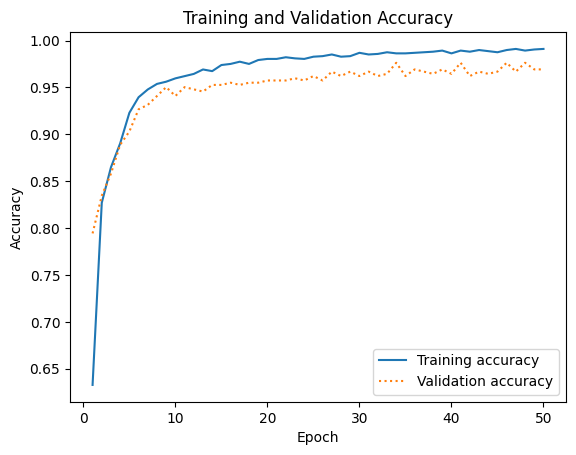

In [35]:
#plotting our training accuracy versus our validation accuracy
sns.reset_orig()

acc = hist3.history['accuracy']
val = hist3.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

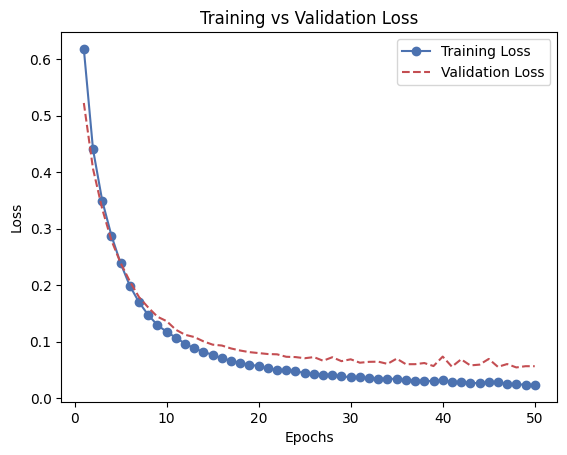

In [36]:
#Plotting the loss values of training vs validation

# Reset seaborn settings
sns.reset_orig()

# Extract loss values
train_loss = hist3.history['loss']
val_loss = hist3.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training vs validation loss
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' means blue line with circle markers
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')  # 'r--' means red dashed line
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
sns.reset_orig()
y_predicted2 = model3.predict(X_test_scaled) > 0.5

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Accuracy: 0.9693
Recall: 0.9757
F1 Score: 0.9687
Precision: 0.9617


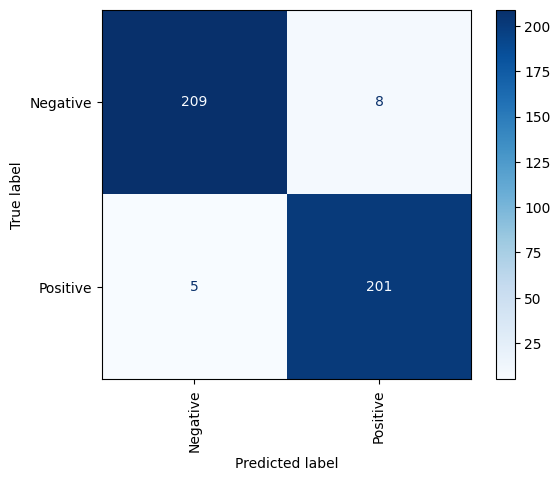

In [38]:
# Reset seaborn settings
sns.reset_orig()

accuracy = accuracy_score(y_test, y_predicted2)
recall = recall_score(y_test, y_predicted2)
f1 = f1_score(y_test, y_predicted2)
precision = precision_score(y_test, y_predicted2)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")


labels = ['Negative', 'Positive']
cmd.from_predictions(y_test, y_predicted2, display_labels=labels, cmap='Blues', xticks_rotation='vertical',)

# Show the plot
plt.show()